In [1]:
import pandas as pd
import numpy as np
from calcSMA import calcSMA
from ewm import exponential_weighted_average
from preprocess import read_trade_data
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def cleanData(df):
    """
    Cleans the input data frame, and returns a new data frame with 
    averaged price values for every 10s.
    """
    df['MTS'] = df['MTS'].apply(lambda x: datetime.fromtimestamp(x/1000))
    df.rename(columns = {'MTS':'date', 'PRICE':'price'}, inplace = True)
    df.set_index('date', inplace = True)
    df.sort_index(ascending = True, inplace = True)
    
    df2 = df['price'].resample('10s').mean()
    df2.interpolate(inplace = True)
    df2 = df2.to_frame()
    return df2

In [3]:
btc = pd.read_csv("tBTCUSD_trades.csv")
btc2 = cleanData(btc)
btc2.head()

,price
date,
2018-07-03 15:38:00,6560.074986
2018-07-03 15:38:10,6562.500000
2018-07-03 15:38:20,6563.600756
2018-07-03 15:38:30,6567.370474
2018-07-03 15:38:40,6569.400000


In [4]:
neo = pd.read_csv("tNEOUSD_trades.csv")
neo2 = cleanData(neo)
neo2.head()

,price
date,
2018-07-03 15:35:50,37.886667
2018-07-03 15:36:00,37.855000
2018-07-03 15:36:10,37.830000
2018-07-03 15:36:20,37.790750
2018-07-03 15:36:30,37.784333


In [5]:
omg = pd.read_csv("tOMGUSD_trades.csv")
omg2 = cleanData(omg)
omg2.head()

,price
date,
2018-07-03 15:39:30,8.221453
2018-07-03 15:39:40,8.218468
2018-07-03 15:39:50,8.215484
2018-07-03 15:40:00,8.212500
2018-07-03 15:40:10,8.212500


In [6]:
for i in [3, 6, 12, 18, 30, 60]:
    calcSMA(btc2, btc2['price'], i)
    exponential_weighted_average(btc2, btc2['SMA-%s'%i], btc2['price'], i)
    calcSMA(neo2, neo2['price'], i)
    exponential_weighted_average(neo2, neo2['SMA-%s'%i], neo2['price'], i)
    calcSMA(omg2, omg2['price'], i)
    exponential_weighted_average(omg2, omg2['SMA-%s'%i], omg2['price'], i)

In [21]:
myFmt = mdates.DateFormatter('%H:%M');

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


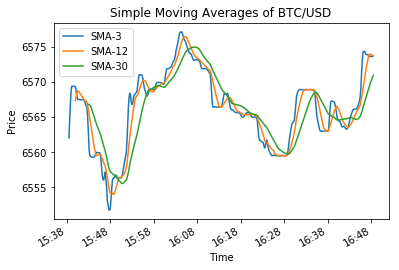

In [22]:
plt.figure(1)
for i in [3, 12, 30]:
    plt.plot(btc2.index.values, btc2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of BTC/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


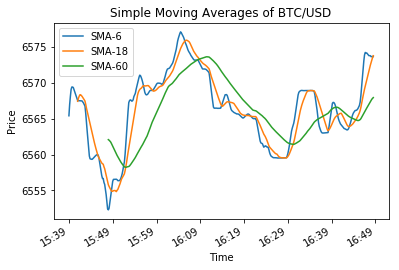

In [23]:
plt.figure(2)
for i in [6, 18, 60]:
    plt.plot(btc2.index.values, btc2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of BTC/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


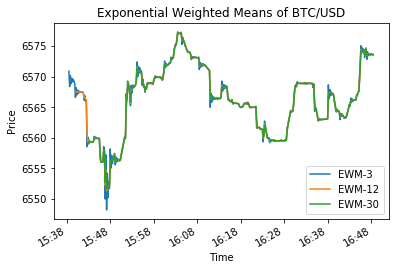

In [24]:
plt.figure(3)
for i in [3, 12, 30]:
    plt.plot(btc2.index.values, btc2['EWM-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Exponential Weighted Means of BTC/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


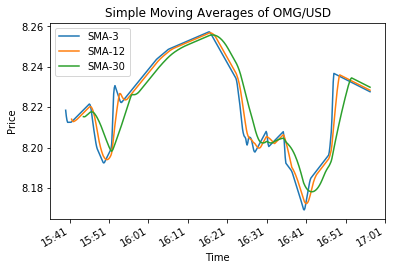

In [25]:
plt.figure(4)
for i in [3, 12, 30]:
    plt.plot(omg2.index.values, omg2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of OMG/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


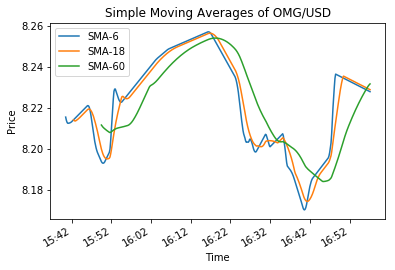

In [26]:
plt.figure(5)
for i in [6, 18, 60]:
    plt.plot(omg2.index.values, omg2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of OMG/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


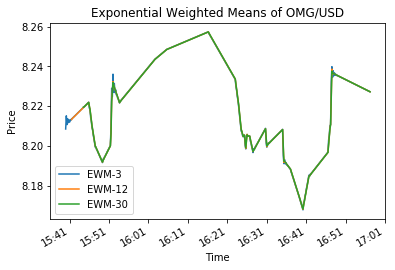

In [27]:
plt.figure(6)
for i in [3, 12, 30]:
    plt.plot(omg2.index.values, omg2['EWM-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Exponential Weighted Means of OMG/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


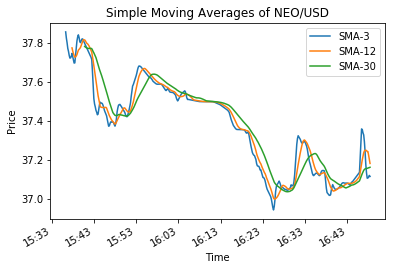

In [28]:
plt.figure(7)
for i in [3, 12, 30]:
    plt.plot(neo2.index.values, neo2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of NEO/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


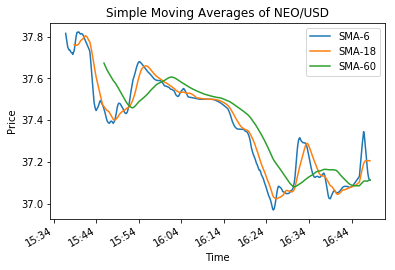

In [29]:
plt.figure(8)
for i in [6, 18, 60]:
    plt.plot(neo2.index.values, neo2['SMA-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Simple Moving Averages of NEO/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


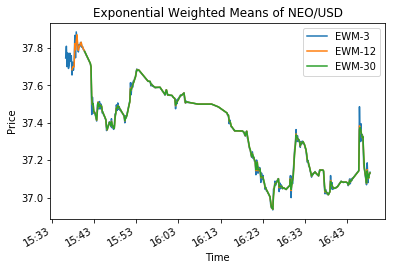

In [30]:
plt.figure(9)
for i in [3, 12, 30]:
    plt.plot(neo2.index.values, neo2['EWM-%s'%i])
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('Exponential Weighted Means of NEO/USD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
def fish_func(dataFrame):
    df_price = dataFrame["price"]
    df_norm = (df_price - df_price.mean()) / (df_price.max() - df_price.min())
    dataFrame["fisher_Transform"] = np.arctanh(df_norm)

In [32]:
fish_func(btc2)
fish_func(neo2)
fish_func(omg2)

/Users/priyansh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


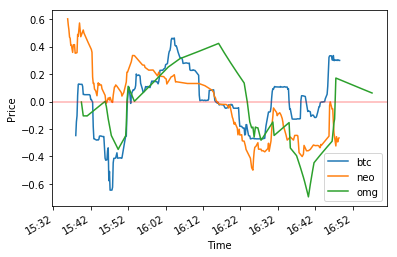

In [33]:
plt.figure(1)
plt.plot(btc2.index.values, btc2['fisher_Transform'], label = "btc")
plt.plot(neo2.index.values, neo2['fisher_Transform'], label = "neo")
plt.plot(omg2.index.values, omg2['fisher_Transform'], label = "omg")
plt.axhline(y=0, alpha = .3, color = 'red')
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.gcf().autofmt_xdate();
plt.title('')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()